In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [3]:
Dataset=pd.read_csv("C:/Users/Dmwin/Downloads/Jupyter/datasets/gld_price_data.csv")

In [4]:
Dataset.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [5]:
Dataset.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [6]:
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [7]:
Dataset.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [8]:
Dataset.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [10]:
correlation=Dataset.drop("Date", axis=1).corr()

<Axes: >

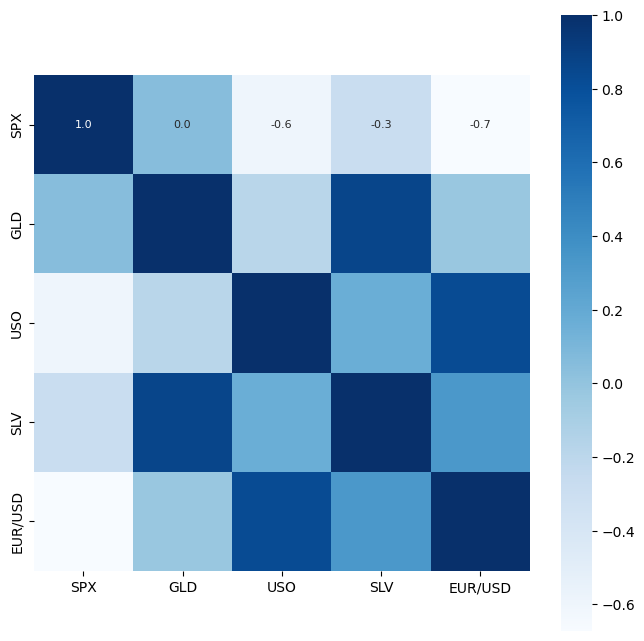

In [13]:
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='Blues')
#positive is positive correlation and negatvie is negative correlation

In [15]:
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


C:\Users\Dmwin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


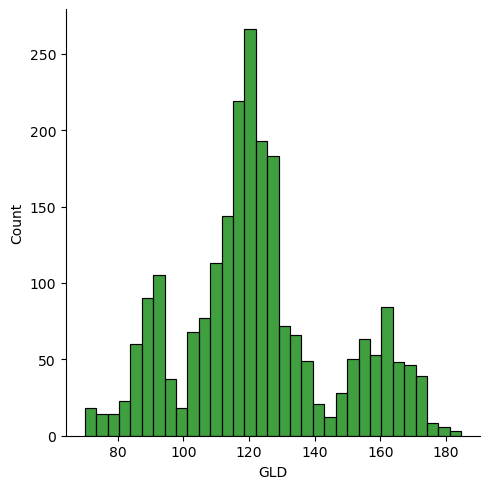

In [18]:
#checking the distribution of the GLD Price
sns.displot(Dataset['GLD'],color='green')

In [20]:
X = Dataset.drop(['Date','GLD'],axis=1)
Y = Dataset['GLD']

In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

In [22]:
regressor = RandomForestRegressor(n_estimators=100)

In [23]:
regressor.fit(X_train,Y_train)

RandomForestRegressor()

In [24]:
test_data_prediction = regressor.predict(X_test)

In [25]:
print(test_data_prediction)

[168.75099977  81.79679981 115.90270009 127.61410059 120.68220129
 154.74659772 150.37449884 126.19550017 117.50929889 126.12260024
 116.76420108 171.82730105 141.66189851 167.71679894 115.19979992
 117.47040052 138.03510299 169.99800039 159.93220283 161.04989965
 155.10800045 124.99120031 175.95369977 157.21260287 125.13180023
  93.85699982  78.30900015 120.65219975 119.02999929 167.38009979
  88.19800015 125.19350033  91.17680088 117.67400025 121.09679905
 136.71920111 115.4248014  115.25990073 149.27040009 107.0953007
 104.36720273  87.1060978  126.49090056 118.15620016 153.8459992
 119.67500052 108.35780025 107.99109826  93.25550033 127.18439761
  74.58860041 113.57289907 121.48090038 111.38879883 118.84339908
 120.68959966 159.12349952 165.32900116 146.83659682  85.94879853
  94.26190042  86.81239851  90.62360028 119.04010068 126.47260063
 127.53499969 168.89279985 122.29789932 117.46349873  98.27830037
 168.2168012  143.10729833 131.85820272 121.23710226 121.01879973
 119.9645006

In [26]:
Y_test = list(Y_test)

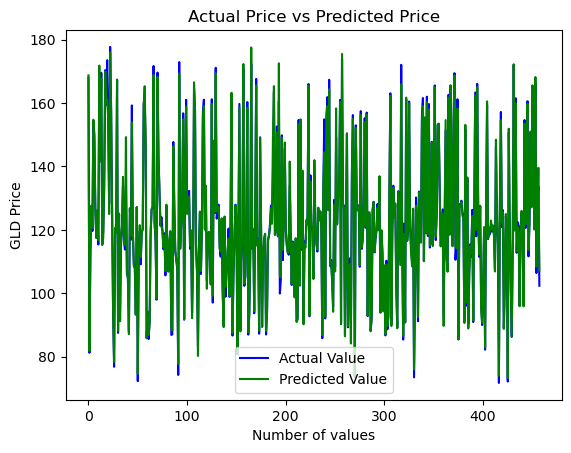

In [27]:
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()